# Inhoudsopgave

- Inleiding
- Onderzoeksvragen
- Data analyse
    - Importeren Python Modules
    - Inladen van de Data
        - Species Dataframe
        - Observations Dataframe
    - Algemeen data-onderzoek
        - Species Dataframe
        - Observations Dataframe
    - Conclusie
- Analyse onderzoeksvragen
    - Is er een verschil in biodiversiteit tussen de parken en is dit verschil significant?
        - Conclusie
    - Wat is de status van de verschillende bedreigde soorten?
        - Conclusie
    - Worden sommige soorten eerder met uitsterven bedreigd dan andere en is dit verschil significant?
        - Conclusie
    - Welke soorten komen het vaaks voor in de parken?
        - Conclusie
- Eindconclusie
- Evaluatie en vervolgonderzoek

# Inleiding

In de parken van 'National Parks Service' leven een aantal begreigde soorten. 'National Parks Service' wil er zeker van zijn dat het de goede kant op gaat met deze bedreigde soorten. Om dit te kunnen monitoren heeft het park inzicht nodig in de huidige staat van de verschillende soorten.
Het doel van dit project is het analyseren van de huidige biodiversiteit in de parken van 'National Parks Service'.

In dit project zullen de volgende zaken aan bod komen: De onderzoeksvragen, data analyse, conclusie met mogelijke verklaring van bevindingen en de evaluatie van het project met voorstellen voor vervolgonderzoek.


# Onderzoeksvragen

'National Parks Service' zou graag een antwoord hebben op de volgende onderzoeksvragen:
- Is er een verschil in biodiversiteit tussen de parken en is dit verschil significant?
- Wat is de status van de verschillende bedreigde soorten?
- Worden sommige soorten eerder met uitsterven bedreigd dan andere en is dit verschil significant?
- Welke soorten komen het vaaks voor in de parken ?


# Data analyse

In deze sectie zullen de benodigde Python libraries en de aangeleverde data worden ingeladen. De data zal worden bekeken en indien nodig worden opgeschoont. Verder zal er algemene statistiek op de data worden uitgevoerd.

### Importeren Python Modules

Allereerst worden de, voor dit project, benodigde Python libraries geimporteerd.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

### Inladen van de Data

Voor dit project zijn twee bestanden aangeleverd: 'species_info.csv' en 'observations.csv'.
Deze bestanden zullen ingeladen als 'DataFrames' met de namen 'species' en 'observations'. Om een globale indruk van de data te krijgen zullen, van elke 'DataFrame', de eerste rijen worden getoond.

**Databron:** De data is aangeleverd door 'Codecademy' (https://www.codecademy.com).

#### Species Dataframe

Het `species_info.csv` bestand bevat informatie over de dieren in de verschillende nationale parken. De tabel bevat vier kolommen met de volgende informatie:
- **category** - De klasse van de betreffende soort
- **scientific_name** - De wetenschappelijke naam van de soort
- **common_names** - De naam van de soort in de volksmond
- **conservation_status** - De status van bedreiging van de soort

In [3]:
# Inladen van de 'species' data
species = pd.read_csv('species_info.csv')

# Tonen van de eerste vijf rijen van de species dataframe
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Observations Dataframe

Het `Observations.csv` bestand bevat informatie over de observatie van de dieren in de verschillende nationale parken. De tabel bevat drie kolommen met de volgende informatie:

- **scientific_name** - De wetenschappelijke naam van de soort
- **park_name** - De naam van het nationale park
- **observations** - Het aantal observaties in de afgelopen 7 dagen


In [4]:
# Inladen van de 'observations' data
observations = pd.read_csv('observations.csv')

# Tonen van de eerste vijf rijen van de observations dataframe
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Algemeen data onderzoek

Er zullen wat algemene functies op de data worden toegepast om een betere indruk van de data te krijgen. Er zal gezocht worden naar informatie over het aantal en welke klasses, parken en status van bedreiging. En over bijvoorbeeld het aantal soorten.

#### Species Dataframe

In [5]:
# Informatie betreffende de algehele 'species' DataFrame
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
# Informatie betreffende kolom 'category'
category = list(species['category'].unique())
category_n = species['category'].nunique()
print('Er zijn ' + str(category_n) + ' verschillende klasses: ' + str(category) + '.')

# Informatie betreffende kolom 'scientific_name'
scientific_name_n = species['scientific_name'].nunique()
print('Er zijn ' + str(scientific_name_n) + ' verschillende soorten in de vier parken.')

# Informatie betreffende kolom 'conservation_status'
conservation_status = list(species['conservation_status'].unique())
conservation_status_n = species['conservation_status'].nunique()
print('Er zijn ' + str(conservation_status_n) + ' verschillende \'status van bedreiging\': ' + str(conservation_status) + '.')

Er zijn 7 verschillende klasses: ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'].
Er zijn 5541 verschillende soorten in de vier parken.
Er zijn 4 verschillende 'status van bedreiging': [nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'].


De kolom 'conservation_status' bevat rijen zonder informatie (nan). In dit geval betekend de afwezigheid van informatie dat de betreffende soort geen bedreigde soort is. Niet bedreigd staat gelijk aan geen bedreigde status (nan). Omdat 'nan' in deze context niet correct is, zullen de 'nan' waardes worden vervangen door 'Least concern'.

In [5]:
# Vervangen van 'Nan' waarden door de waarde 'Least concern'
species['conservation_status'].fillna('Least concern', inplace=True)
conservation_status = list(species['conservation_status'].unique())
print(conservation_status)

['Least concern', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


#### Observations Dataframe

In [8]:
# Informatie betreffende de algehele 'observations' DataFrame
observations.describe(include = 'all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [9]:
# Informatie betreffende kolom 'park_name'
park_name = list(observations['park_name'].unique())
park_name_n = observations['park_name'].nunique()
print('Er zijn ' + str(park_name_n) + ' verschillende parken: ' + str(park_name) + '.')

Er zijn 4 verschillende parken: ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park'].


### Conclusie

De tabellen bevatten informatie over vier verschillende parken. In de parken leven 5541 verschillende soorten, verdeeld over zeven klasses. De mate van bedreiging is ingedeeld in vijf stadia.

# Analyse onderzoeksvragen

### Is er een verschil in biodiversiteit tussen de parken en is dit verschil significant?

De biodiversiteit omvat alle soorten planten, dieren en micro-organismen. Onderzocht zal worden of er in de vier parken een verschil is in biodiversiteit. Wanneer dit inderdaad het geval is, zal onderzocht worden of dit verschil significant is.



In [7]:
"""
Per park wordt een tabel gemaakt. De 'observations' tabel wordt verdeeld over de volgende 4 tabellen:
GSM = 'Great Smoky Mountains National Park'
YM = 'Yosemite National Park'
B = 'Bryce National Park'
YS = 'Yellowstone National Park'
"""

GSM = observations[(observations['park_name'] == 'Great Smoky Mountains National Park') & 
                   (observations['observations'] >= 1)]
YM = observations[(observations['park_name'] == 'Yosemite National Park') & 
                   (observations['observations'] >= 1)]
B = observations[(observations['park_name'] == 'Bryce National Park') & 
                   (observations['observations'] >= 1)]
YS = observations[(observations['park_name'] == 'Yellowstone National Park') & 
                   (observations['observations'] >= 1)]

# De lengte van elke tabel wordt uitgeprint. De lengte van de tabel is een maat voor het aantal diersoorten in de tabel.
print('In \'Great Smoky Mountains National Park\' leven ' + str(len(GSM.drop_duplicates(subset=['scientific_name']))) + ' soorten.')
print('In \'Yosemite National Park\' leven ' + str(len(YM.drop_duplicates(subset=['scientific_name']))) + ' soorten.')
print('In \'Bryce National Park\' leven ' + str(len(B.drop_duplicates(subset=['scientific_name']))) + ' soorten.')
print('In \'Yellowstone National Park\' leven ' + str(len(YS.drop_duplicates(subset=['scientific_name']))) + ' soorten.')

In 'Great Smoky Mountains National Park' leven 5541 soorten.
In 'Yosemite National Park' leven 5541 soorten.
In 'Bryce National Park' leven 5541 soorten.
In 'Yellowstone National Park' leven 5541 soorten.


In [8]:
# Tabel met het aantal observaties per park
observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


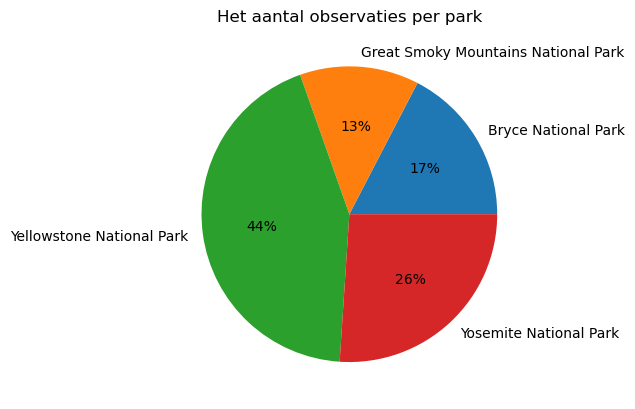

In [9]:
# Pie plot met het aantal observaties per park
observations = [576025, 431820, 1443562, 863332]
labels = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
plt.pie(observations, labels = labels, autopct = '%1.0f%%')
plt.title('Het aantal observaties per park')
plt.show()

#### Conclusie
Verrassend genoeg is er geen verschil in biodiversiteit tussen de parken. Alle soorten komen in elk van de vier parken voor.

In het Yellowstone National Park worden de meeste observaties gedaan. Onduidelijk is of dit informatief is. Er is geen informatie over de grootte van de parken en over het aantal observatiepunten.

### Wat is de status van de verschillende bedreigde soorten?

Gaat het met elke klasse even goed, of bevatten sommige klasse relatief meer soorten met een bedreigde status.

In [10]:
# Dataframe maken met per klasse, het aantal soorten per status van bedreiging
conservation_category = species.groupby(["conservation_status", "category"])\
    ['scientific_name'].count().unstack()

# De 'conservation_status' sorteren van meest bedreigd (bovenaan) naar minst bedreigd (onderaan)
conservation_category_ordered = conservation_category.reindex(['Endangered','Species of Concern','Threatened','In Recovery','Least concern'])

# Nan values vervangen door 0.0
conservation_category_ordered.fillna({'Amphibian':'0.0', 'Bird':'0.0', 'Fish': 0.0, 'Mammal': 0.0, 'Nonvascular Plant': 0.0, 'Reptile': 0.0, 'Vascular Plant': 0.0}, inplace=True)

# Dataframe tonen
conservation_category_ordered

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,0.0,0.0,1.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,0.0,4.0,2.0,0.0,0.0,2.0
In Recovery,0.0,3.0,0.0,1.0,0.0,0.0,0.0
Least concern,73.0,442.0,116.0,176.0,328.0,74.0,4424.0


In [11]:
# Controleren of alle waarden van het type 'float' zijn
conservation_category_ordered.dtypes

category
Amphibian             object
Bird                  object
Fish                 float64
Mammal               float64
Nonvascular Plant    float64
Reptile              float64
Vascular Plant       float64
dtype: object

In [12]:
# Het type 'object' van de 'Amphibian' en de 'Bird' kolom, omzetten naar het type 'float'
conservation_category_ordered['Amphibian'] = conservation_category_ordered['Amphibian'].astype(float)
conservation_category_ordered['Bird'] = conservation_category_ordered['Bird'].astype(float)

# Controle of het omzetten is gelukt
conservation_category_ordered.dtypes

category
Amphibian            float64
Bird                 float64
Fish                 float64
Mammal               float64
Nonvascular Plant    float64
Reptile              float64
Vascular Plant       float64
dtype: object

In [13]:
# In de Dataframe conservation_category_ordered staan absolute waarden, 
# Om deze waarden makkelijker met elkaar te vergelijken zullen deze waarden worden opgezet naar proporties
for klasse in list(conservation_category_ordered.columns.values):
    conservation_category_ordered[klasse] = conservation_category_ordered[klasse]\
.apply(lambda x: x / len(species[species["category"] == klasse]))

# Dataframe tonen
conservation_category_ordered

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,0.0125,0.007678,0.023622,0.032710,0.000000,0.000000,0.000224
Species of Concern,0.0500,0.138196,0.031496,0.130841,0.015015,0.063291,0.009620
Threatened,0.0250,0.000000,0.031496,0.009346,0.000000,0.000000,0.000447
In Recovery,0.0000,0.005758,0.000000,0.004673,0.000000,0.000000,0.000000
Least concern,0.9125,0.848369,0.913386,0.822430,0.984985,0.936709,0.989709


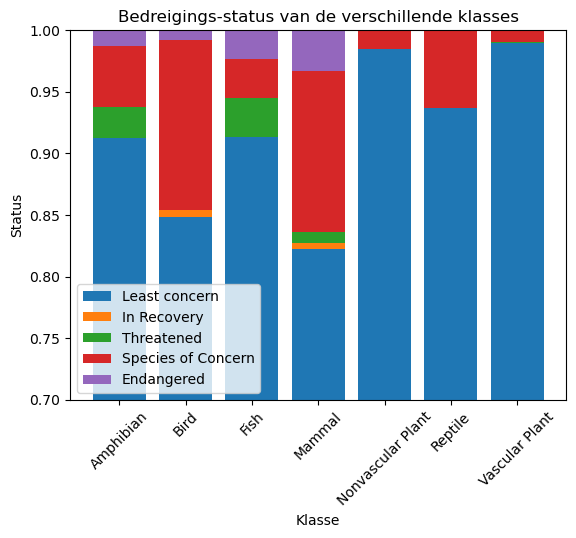

In [12]:
# Ter visualisatie worden de getallen van de conservation_category_ordered Dataframe verwerkt in een gestapelde staafdiagram

# Aanmaken x en y data
x = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
y1 = np.array([0.9125, 0.848369, 0.913386, 0.822430, 0.984985, 0.936709, 0.989709])
y2 = np.array([0.0000, 0.005758, 0.000000, 0.004673, 0.000000, 0.000000, 0.000000])
y3 = np.array([0.0250, 0.000000, 0.031496, 0.009346, 0.000000, 0.000000, 0.000447])
y4 = np.array([0.0500, 0.138196, 0.031496, 0.130841, 0.015015, 0.063291, 0.009620])
y5 = np.array([0.0125, 0.007678, 0.023622, 0.032710, 0.000000, 0.000000, 0.000224])

# Maken van een gestapelde staafdiagram
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.bar(x, y3, bottom=y1+y2)
plt.bar(x, y4, bottom=y1+y2+y3)
plt.bar(x, y5, bottom=y1+y2+y3+y4)

plt.xlabel('Klasse')
plt.xticks(rotation=45)
plt.ylabel('Status')
plt.ylim(0.7, 1.0)
plt.legend(["Least concern", "In Recovery", "Threatened", "Species of Concern", "Endangered"])
plt.title("Bedreigings-status van de verschillende klasses")
plt.show()

NB. Het grootste deel van de soorten word niet bedreigd. Om de verschillende status van bedreiging van de klasses beter zichtbaar te maken is er ingezoomed op de Y-as.

In [18]:
# Vogels en zoogdieren hebben relatief meer soorten met een bedreigde status.

# Berekening percentages
percentage_endangered_birds = round((1-0.848369)*100, 1)
percentage_endangered_mammels = round((1-0.822430)*100, 1)
print('Het percentage bedreigde vogelsoorten is ' + str(percentage_endangered_birds) + '%')
print('Het percentage bedreigde zoogdiersoorten is ' + str(percentage_endangered_mammels) + '%')

Het percentage bedreigde vogelsoorten is 15.2%
Het percentage bedreigde zoogdiersoorten is 17.8%


#### Conclusie
Vogels en zoogdieren hebben relatief meer soorten met een bedreigde status t.o.v. amfibieen, vissen, reptilen en planten.
De twee klasse van planten (nonvascular en vascular) bevatten relatief de minste soorten met een bedreigde status.

### Worden sommige soorten eerder met uitsterven bedreigd dan andere en is dit verschil significant?

In de klasses vogel en zoogdier komen de meeste bedreigde soorten voor. Het aantal bedreigde vogelsoorten lijkt relatief groter. 

Onderzocht wordt of dit verschil in het aantal bedreigde soorten tussen vogels en zoogdieren significant is. Dit wordt onderzocht door de p-waarde uit te rekenen, waarbij een grenswaarde van 0.05 wordt aangehouden. Voor het berekenen van de p-waarde zijn de absolute aantallen (niet) bedreide soorten nodig. Deze zijn in het voorgaande hoofdstuk berekend:

||Bedreigd|Niet bedreigd|
|-|-|-|
|Vogels|79|442|
|Zoogdieren|38|176|

Indien het verschil significant is dan zal voor de zoogdierklasse worden onderzocht welk geslacht dan de meeste bedreigde diersoorten bevat. Indien het verschil niet significant is, dan zal voor beide klasse worden onderzocht welk geslacht dan de meeste bedreigde diersoorten bevat.

In [43]:
# De p-waarde wordt berekend met de absolute aantallen bedreigde en niet bedreigde soorten. 
# Deze getallen staan in een frequentietabel (contingency table)
contingency_table = [[79, 442],
              [38, 176]]
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.5810483277947567, pvalue=0.445901703047197, dof=1, expected_freq=array([[ 82.93469388, 438.06530612],
       [ 34.06530612, 179.93469388]]))

De p-waarde is 0.45, dit is hoger dan 0.05. Het verschil in het aantal bedreide diersoorten tussen de vogel en de zoogdier klasse is daarmee niet significant. De klasse vogels en zoogdieren bevatten beide de meeste bedreigde diersoorten. 
Voor de beide klasses worden onderzocht welk geslacht dan de meeste bedreigde diersoorten bevat.

#### Vogels

In [71]:
# Er wordt een Dataframe gemaakt met alleen vogels met een bedreide status.
bedreigde_vogels = species[(species['category'] == 'Bird') & (species['conservation_status'] != 'Least concern')]

# Aan de Dataframe wordt een losse kolom toegevoegd met alleen het eerste deel van de wetenschappelijke naam (vogels van hetzelde geslacht)
bedreigde_vogels['genus'] = bedreigde_vogels['scientific_name'].str.split(' ').str[0]

# Dataframe tonen
bedreigde_vogels.head()

C:\Users\Muit001J\AppData\Local\Temp\ipykernel_14100\1296012687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bedreigde_vogels['genus'] = bedreigde_vogels['scientific_name'].str.split(' ').str[0]


,category,scientific_name,common_names,conservation_status,genus
91,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Accipiter
93,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,Accipiter
94,Bird,Aquila chrysaetos,Golden Eagle,Species of Concern,Aquila
96,Bird,Buteo lineatus,Red-Shouldered Hawk,Species of Concern,Buteo
98,Bird,Circus cyaneus,Northern Harrier,Species of Concern,Circus


In [70]:
# Er wordt geteld hoe vaak het eerste deel van de wetenschappelijke naam (dieren van hetzelde geslacht) voorkomt.
bedreigde_vogels.genus.value_counts().sort_values()

Oreoscoptes    1
Plegadis       1
Calcarius      1
Empidonax      1
Botaurus       1
              ..
Gavia          2
Buteo          2
Pandion        2
Riparia        2
Falco          4
Name: genus, Length: 65, dtype: int64

#### Zoogdieren

In [72]:
# Er wordt een Dataframe gemaakt met alleen zoogdieren met een bedreide status.
bedreigde_zoogdieren = species[(species['category'] == 'Mammal') & (species['conservation_status'] != 'Least concern')]

# Aan de Dataframe wordt een losse kolom toegevoegd met alleen het eerste deel van de wetenschappelijke naam (dieren van hetzelde geslacht)
bedreigde_zoogdieren['genus'] = bedreigde_zoogdieren['scientific_name'].str.split(' ').str[0]

# Dataframe tonen
bedreigde_zoogdieren.head()

C:\Users\Muit001J\AppData\Local\Temp\ipykernel_14100\2144416911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bedreigde_zoogdieren['genus'] = bedreigde_zoogdieren['scientific_name'].str.split(' ').str[0]


,category,scientific_name,common_names,conservation_status,genus
7,Mammal,Canis latrans,Coyote,Species of Concern,Canis
8,Mammal,Canis lupus,Gray Wolf,Endangered,Canis
9,Mammal,Canis rufus,Red Wolf,Endangered,Canis
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,Eptesicus
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,Lasionycteris


In [74]:
# Er wordt geteld hoe vaak het eerste deel van de wetenschappelijke naam (dieren van hetzelde geslacht) voorkomt.
bedreigde_zoogdieren.genus.value_counts().sort_values()

Glaucomys         1
Ursus             1
Antrozous         1
Euderma           1
Sorex             1
Bassariscus       1
Lasiurus          1
Lepus             1
Sylvilagus        1
Aplodontia        1
Eptesicus         2
Lasionycteris     2
Ovis              2
Taxidea           2
Canis             5
Myotis           15
Name: genus, dtype: int64

#### Conclusie

Er is geen significant verschil gevonden tussen het aantal bedreigde diersoorten van de vogel- en de zoogdierklasse.

In de vogelklasse komen de diersoorten met de geslachtsnaam 'Falco' het vaakst voor in de tabel met bedreigde vogels. Het geslacht Falco bevat alle valkachtigen.

In de zoogdierklasse komen de diersoorten met de geslachtsnaam 'Myotis' het vaakst voor in de tabel met bedreigde zoogdieren. Myotis is een geslacht van gladneusvleermuizen.

### Welke soorten komen het vaaks voor in de parken ?

Eerst zal worden onderzocht van welk geslacht de meeste soorten voorkomen in de parken. <br>
Vervolgens zal worden onderzocht welke soorten het meest worden geobserveert.


In [76]:
# Aan de species Dataframe wordt een losse kolom toegevoegd,
# met alleen het eerste deel van de wetenschappelijke naam (soorten van hetzelde geslacht)
species['genus'] = species['scientific_name'].str.split(' ').str[0]

# Er wordt geteld hoe vaak het eerste deel van de wetenschappelijke naam (soorten van hetzelde geslacht) voorkomt.
species.genus.value_counts().sort_values()

Tribulus        1
Caltha          1
Ictinia         1
Xema            1
Cathartes       1
             ... 
Ranunculus     43
Salix          46
Viola          54
Juncus         60
Carex         217
Name: genus, Length: 1595, dtype: int64

In [77]:
# Er wordt een Dataframe gemaakt met alleen dieren.
dieren = species[(species['category'] != 'Nonvascular Plant') & (species['category'] != 'Vascular Plant')]

# Aan de Dataframe wordt een losse kolom toegevoegd met alleen het eerste deel van de wetenschappelijke naam (dieren van hetzelde geslacht)
dieren['genus'] = dieren['scientific_name'].str.split(' ').str[0]

# Er wordt geteld hoe vaak het eerste deel van de wetenschappelijke naam (dieren van hetzelde geslacht) voorkomt.
dieren.genus.value_counts().sort_values()

C:\Users\Muit001J\AppData\Local\Temp\ipykernel_14100\9972485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dieren['genus'] = dieren['scientific_name'].str.split(' ').str[0]


Ptychocheilus     1
Oreoscoptes       1
Callipepla        1
Hypsiglena        1
Contia            1
                 ..
Etheostoma       15
Dendroica        15
Sorex            16
Myotis           17
Setophaga        20
Name: genus, Length: 430, dtype: int64

In [78]:
# De observations Dataframe wordt gesorteerd op het aantal observaties.
observations.observations.sort_values()

9418       9
15511     10
16054     11
18823     11
20375     12
        ... 
7112     314
20734    316
8749     316
1168     317
11281    321
Name: observations, Length: 23296, dtype: int64

De soort met indexnummer 11281 wordt het meest geobserveerd.

In [17]:
# De soort met indexnummer 11281 wordt opgeroepen
print('Indexnummer 11281 correspondeerd met de soort ' + str(observations.iloc[11281][0]))

Indexnummer 11281 correspondeerd met de soort Lycopodium tristachyum


#### Conclusie
Van alle soorten (zowel plant als dier), komen de soorten met de geslachtsnaam 'Carex' het vaakst voor in de Nationale parken. Carex is een plant met een grasachtige groeivorm. 

Van alle diersoorten komen de soorten met de geslachtsnaam 'Setophaga' het vaakst voor. Setophaga is een geslacht van Amerikaanse zangvogels.

Wanneer enkel wordt gekeken naar het absolute aantal observaties dan wordt de kleine wolfsklauw (Lycopodium tristachyum) het vaakst geobserveerd van alle soorten. Deze soort is in 7 dagen tijd 321 keer gezien in Yellowstone National Park.

# Eindconclusie

In de parken van 'National Parks Service' leven 5541 verschillende soorten, waarvan 191 soorten een bedreigde status hebben. Om het behoud van deze bedreigde soorten te waarborgen zijn een aantal vragen gesteld m.b.t. de huidige staat van deze bedreigde status. Deze vragen hebben de volgende antwoorden opgeleverd:


- Er geen verschil in biodiversiteit tussen de parken. Alle soorten komen in elk van de vier parken voor.

- Vogels en zoogdieren hebben relatief de meeste soorten met een bedreigde status. De twee klasse van planten (nonvascular en vascular) bevatten relatief de minste soorten met een bedreigde status.

- Er is geen significant verschil gevonden tussen het aantal bedreigde diersoorten van de vogel- en de zoogdierklasse. In de vogelklasse worden diersoorten met de geslachtsnaam 'Falco' het meest bedreigd. In de zoogdierklasse worden de diersoorten met de geslachtsnaam 'Myotis' het meest bedreigd.*

- Van alle plantensoorten komen de soorten met de geslachtsnaam 'Carex' het vaakst voor. Van alle diersoorten komen de soorten met de geslachtsnaam 'Setophaga' het vaakst voor.* De kleine wolfsklauw (Lycopodium tristachyum) wordt het vaakst geobserveerd van alle soorten. 



*NB. Deze conclusie is enkel gebasseerd op het aantal maal dat de geslachtsnaam voorkomt in de tabellen. Sommige geslachten hebben echter veel meer soorten dan andere geslachten en zullen om die reden een vertekend beeld kunnen geven van de werkelijkheid. Zie 'Evaluatie en vervolgonderzoek' voor aanbeveling vervolgonderzoek.


# Evaluatie en vervolgonderzoek

Voor diepgaand onderzoek is aanvullende informatie nodig. In het Yellowstone National Park worden bijvoorbeeld de meeste observaties gedaan. Onduidelijk is of dit informatief is. Er is geen informatie over de grootte van de vier parken en over het aantal observatiepunten.

Ook is de wijze van observatie onduidelijk. Worden planten eenmaal geteld en kan hetzelfde dier bijvoorbeeld meerdere malen geteld worden op verschillende tijden of locaties. En wordt er bij het observeren rekening gehouden met de leefwijze van de dieren (schuw of niet, groot of klein territorium, dag- of nachtdier, etc.)


In een vervolgonderzoek kan het informatief zijn om alle vragen per park te beantwoorden, om eventuele verschillen in de parken zichtbaar te maken. Bijvoorbeeld: 'Is het aantal bedreigde soorten in de vier verschillende parken gelijk, of hebben sommige parken minder bedreigde soorten?' Of, is het aantal bedreigde soorten gelijk, maar betreft het verschillende soorten?

Verder dient het aanbeveling om geen onderzoek te doen naar groepen dieren (geslachten), maar het aantal observaties per diersoort te monitoren. Zo ontstaat er een duidelijk beeld hoe het gaat per indivuele diersoort.



